## 1 uždavinys „Objektų klasterizacija, taikant k-means algoritmą“
### Lentelėje pateikti pacientų duomenys, kurie serga tam tikra liga. Ligos simptomai aprašyti požymiais, nuo 1 iki 10. Reikšmė 1 reiškia, kad pacientas turi atitinkamą simptomą, 0 –simptomas nepasireiškė. Pritaikius k-mean metodą suskaidykite lentelėje 1 esančius duomenis į 3 klasterius. Žinoma, kad pacientui „Vardas1“ nustatyta COVID liga. Kokie pacientai pataikė į rizikos grupę, tai yra į vieną klasterį su sergančiu pacientu „Vardas1“? Parašykite programą Atlikite duomenų esančių lentelėje 1 išskaidymą į 3 klasterius. Pritaikykite k-mean algoritmą.

Užkrauname reikiamas bibliotekas

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/home/robert/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Nuskaitome duomenys

In [2]:
d = pd.read_csv("/home/robert/Desktop/Laborai/nn/2lab/pacientai.csv", header=1, index_col=False)

del d['Pacientai']

#### 1. K-Means, kai K yra žinomas

In [3]:
k=3 # pagal salyga

km = KMeans(n_clusters=k, random_state=2021)
km.fit(d)
y_km = km.predict(d)  # priskiriame klasterius atitinkamiem pacientam.

# Kurie pacientai pateko i rizikos grupe (klasteri) kartu su pirmuoju pacientu?
covid_klasteris = y_km[0]
rizikos_pacientai = np.where(y_km==covid_klasteris)[0]+1

for x in rizikos_pacientai:
    print("Pacientas Vardas {} yra patekes i rizikos grupe".format(x))

Pacientas Vardas 1 yra patekes i rizikos grupe
Pacientas Vardas 2 yra patekes i rizikos grupe
Pacientas Vardas 4 yra patekes i rizikos grupe
Pacientas Vardas 6 yra patekes i rizikos grupe
Pacientas Vardas 8 yra patekes i rizikos grupe
Pacientas Vardas 11 yra patekes i rizikos grupe
Pacientas Vardas 12 yra patekes i rizikos grupe
Pacientas Vardas 13 yra patekes i rizikos grupe
Pacientas Vardas 14 yra patekes i rizikos grupe


#### 2. K-Means, kai K yra nežinomas, reikia nustatyti K

array([-11.85555556,  -3.91666667,  -3.34444444,  -1.85      ,
        -1.91666667,  -1.41666667,  -1.5       ,  -1.33333333,
        -0.83333333])

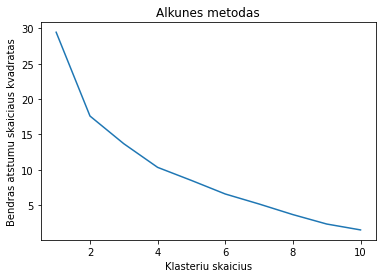

In [4]:
val = []
# iterauojam per skirtingus k
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=2021)
    km.fit(d)
    val.append(km.inertia_)
    
plt.plot(range(1,11), val)
plt.title("Alkunes metodas")
plt.xlabel("Klasteriu skaicius")
plt.ylabel("Bendras atstumu skaiciaus kvadratas")

np.diff(val) # paskaiciavus skirtumus, matome, kad 5 klasteriai butu optimalu, nes tarp ju pokytis labai mazas

Galėtume sakyti, kad pagal šį kriteirjų galime nustatyti k=5.